<a href="https://colab.research.google.com/github/LeMinhTruong16/AI/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

57026/57026 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              14000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 515,001
Trainable params: 515,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 12ms/step - loss: 0.4918 - accuracy: 0.9512
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 0.4384 - accuracy: 0.9900
Epoch 3/10
4/4 [==============================] - 0s 10ms/ste

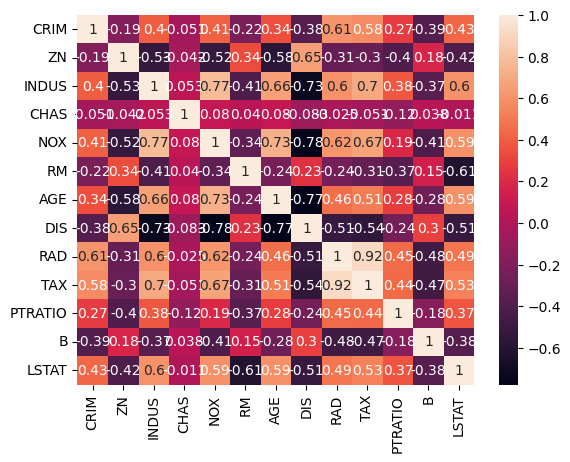

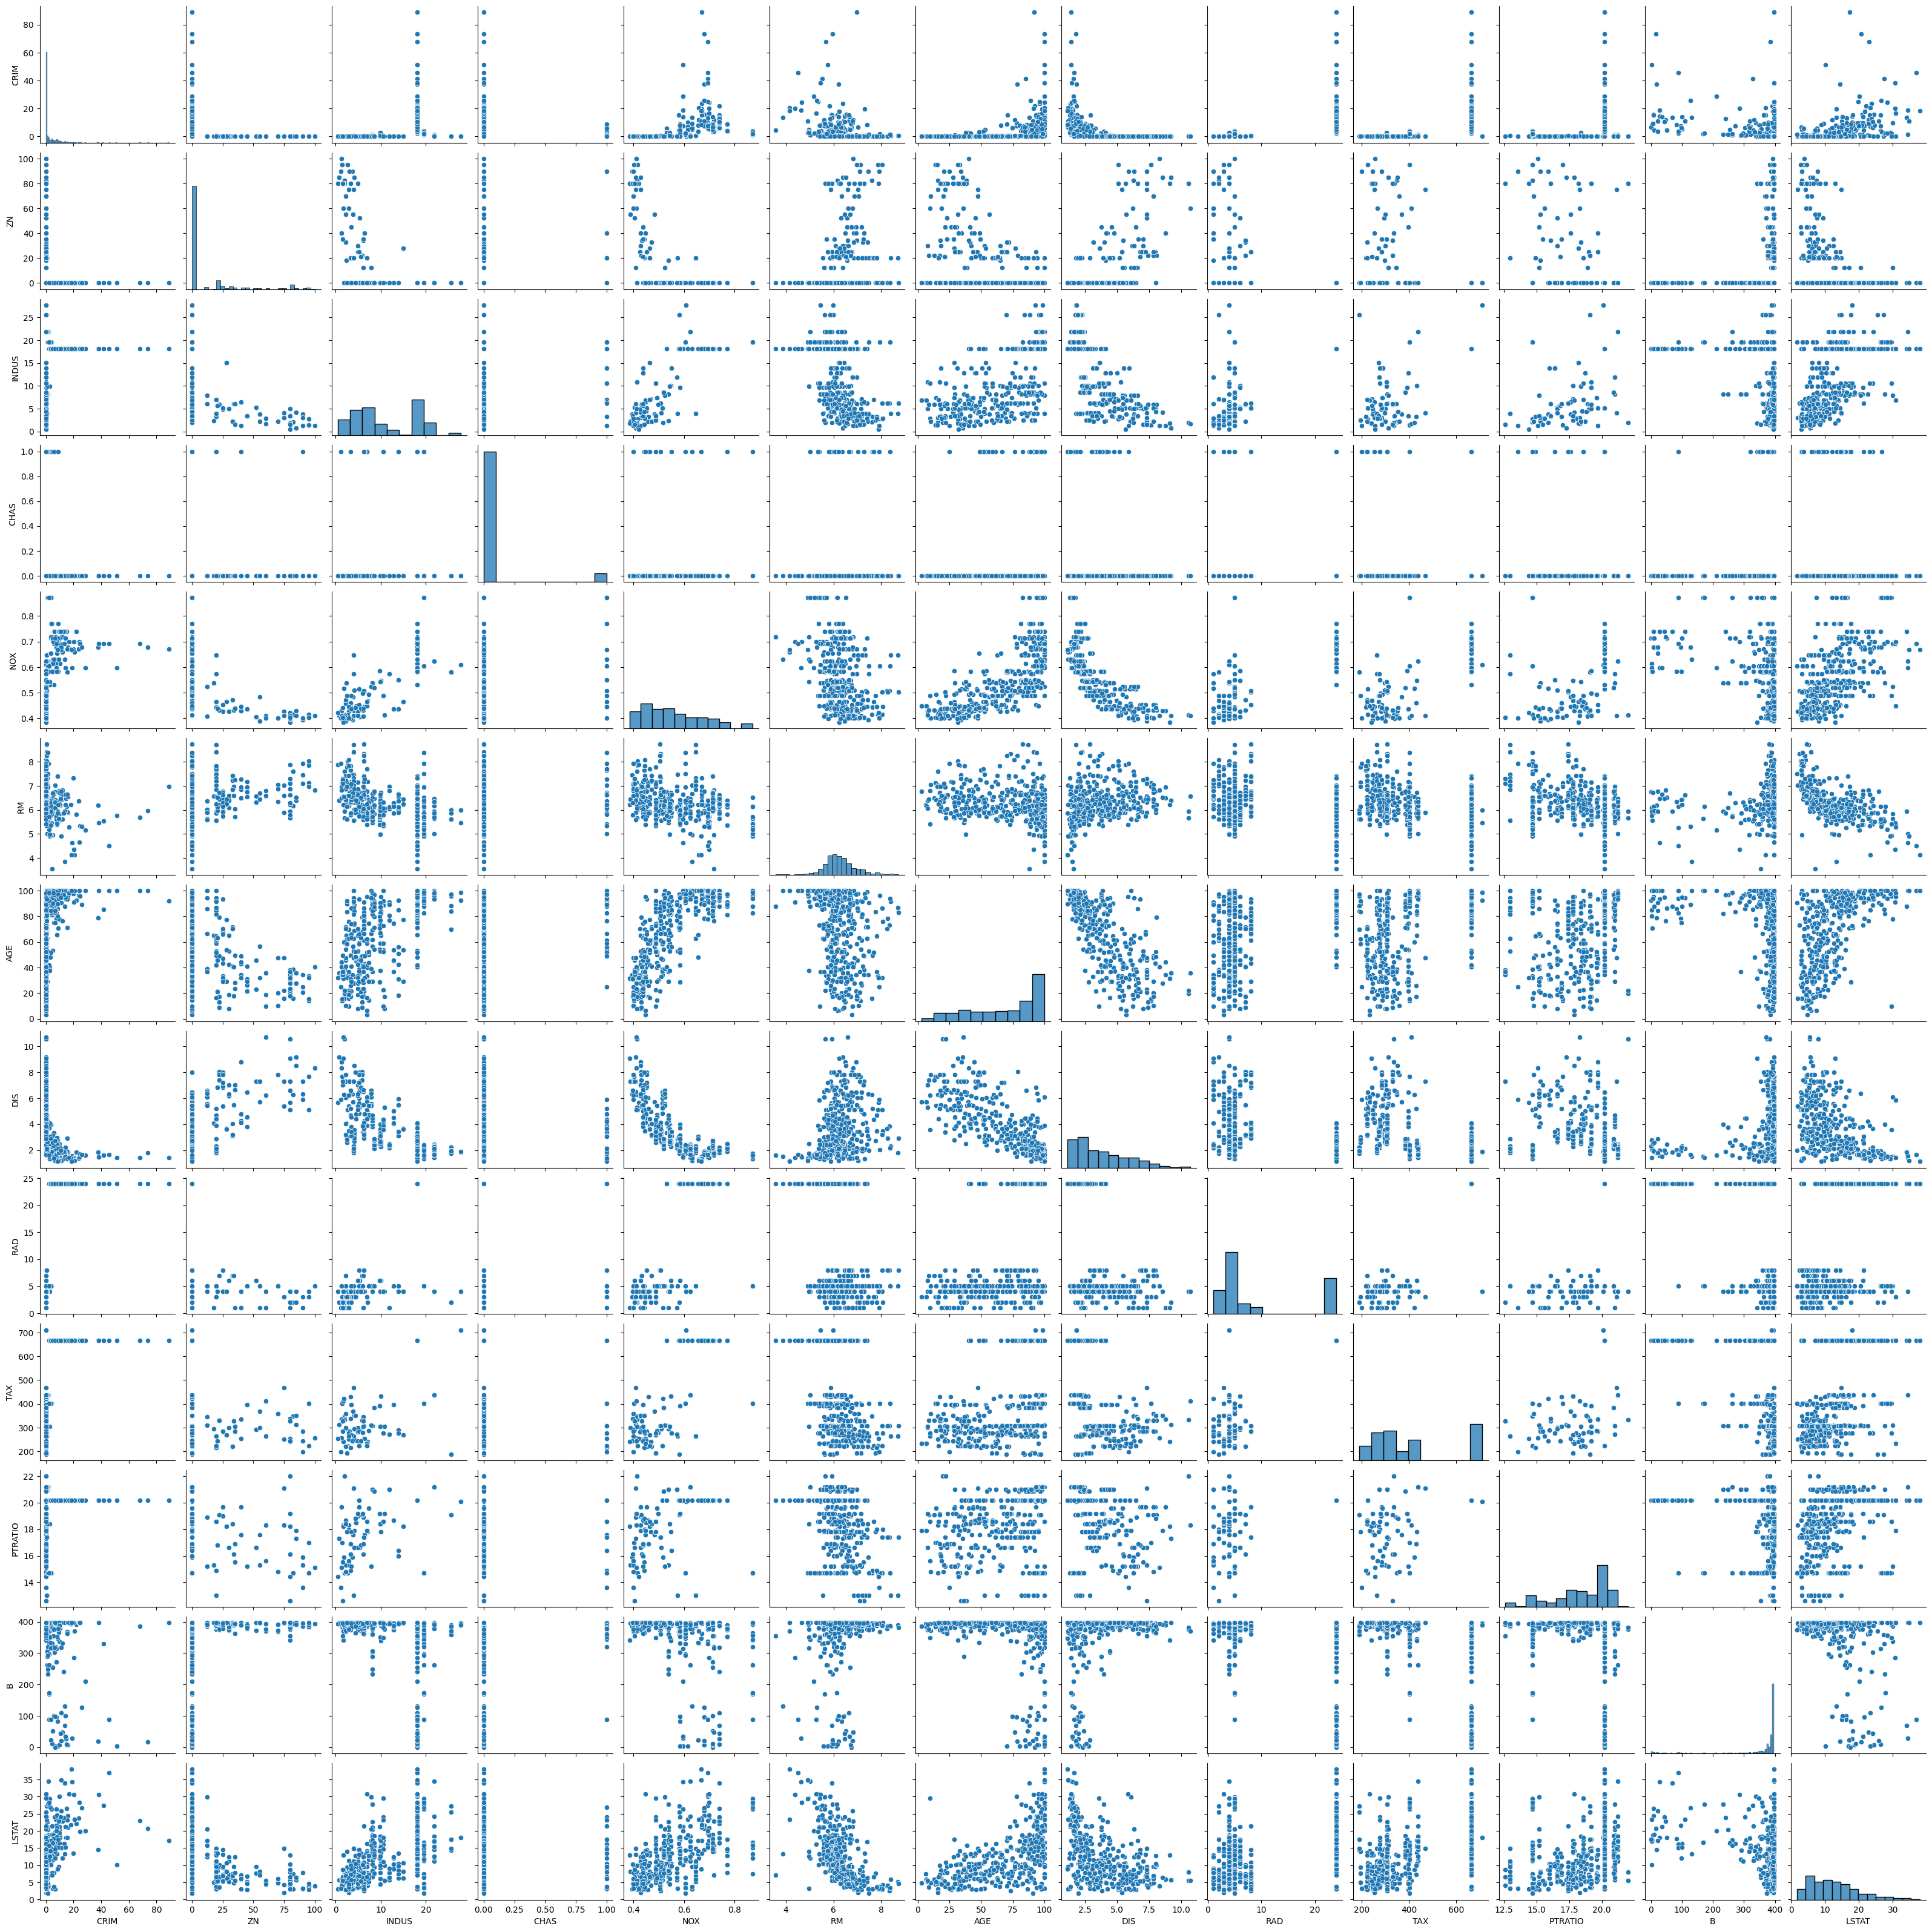

In [1]:
from keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()


import seaborn as sas
import pandas as pd

corr = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']).corr()
sas.heatmap(corr, annot=True)

sas.pairplot(pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']))

x_train.shape

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



x_train=x_train.reshape((404,13))
x_train=x_train.astype('float')/255

x_test=x_test.reshape((102,13))
x_test=x_test.astype('float')/255

from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(1000, activation='relu', input_shape=(13,)))
model.add(Dense(500, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)